In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from scripts.plotting import get_learning_curve_data, set_axes_labels, set_axes_ticks,set_axes_scale
%config InlineBackend.figure_format = 'retina'
plt.style.use('plot.mplstyle')

struct_types = ['atomistic','cg','A_cg']

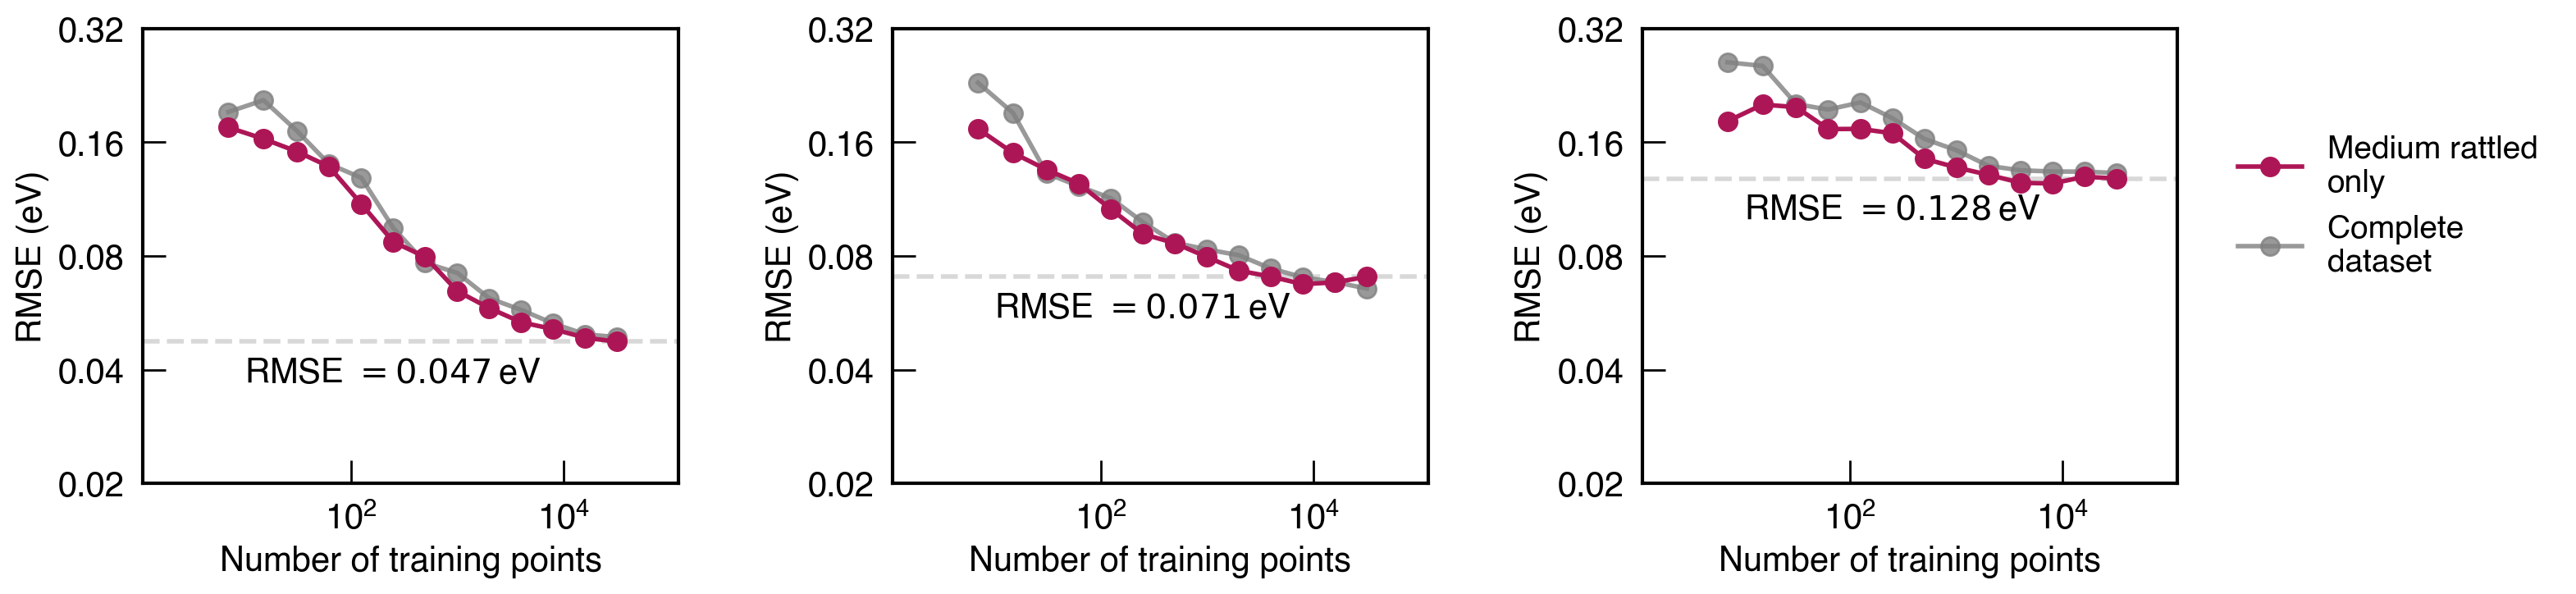

In [18]:
size = 4
fig, axs = plt.subplots(ncols=3,figsize=(4*size,size*0.9))
l_max = 8 
colour = '#AD1656'

for s, ax in zip(struct_types,axs):
    x, y, ticks, labels = get_learning_curve_data(s,l_max,medium_only=True)
    x2, y2, ticks2, labels2 = get_learning_curve_data(s,l_max,medium_only=False)
    ax.plot(x,y,marker='o',linewidth=2,markersize=8,color=colour,zorder=1,label='Medium rattled \nonly')
    ax.plot(x2,y2,marker='o',linewidth=2,markersize=8,color='grey',alpha=0.8,zorder=0,label='Complete \ndataset')

    set_axes_labels(ax,'Number of training points','RMSE (eV)')
    set_axes_scale(ax,x_scale='log',y_scale='log')
    set_axes_ticks(ax,y_labels=labels,y_ticks=ticks,minor_ticks=False)
    ax.set_xlim(1.1,120000)
    
    # label the minimum rmse value
    ax.axhline(y=y[12],linestyle='--',color='grey',linewidth=2,zorder=0,alpha=0.3)
    ax.text(10,y[12],f'\nRMSE $= {y[12]:.3f}\,$eV',fontsize=15,verticalalignment='center',linespacing=2.2,fontdict={'family':'Helvetica','weight':'bold'})
    
plt.subplots_adjust(wspace=0.4)
axs[2].legend(bbox_to_anchor=(1, 0.9),fontsize=14,frameon=False)
plt.savefig(f'../figures/final_figures/complete_vs_medium_learning_curves_lmax{l_max}.pdf',bbox_inches='tight')

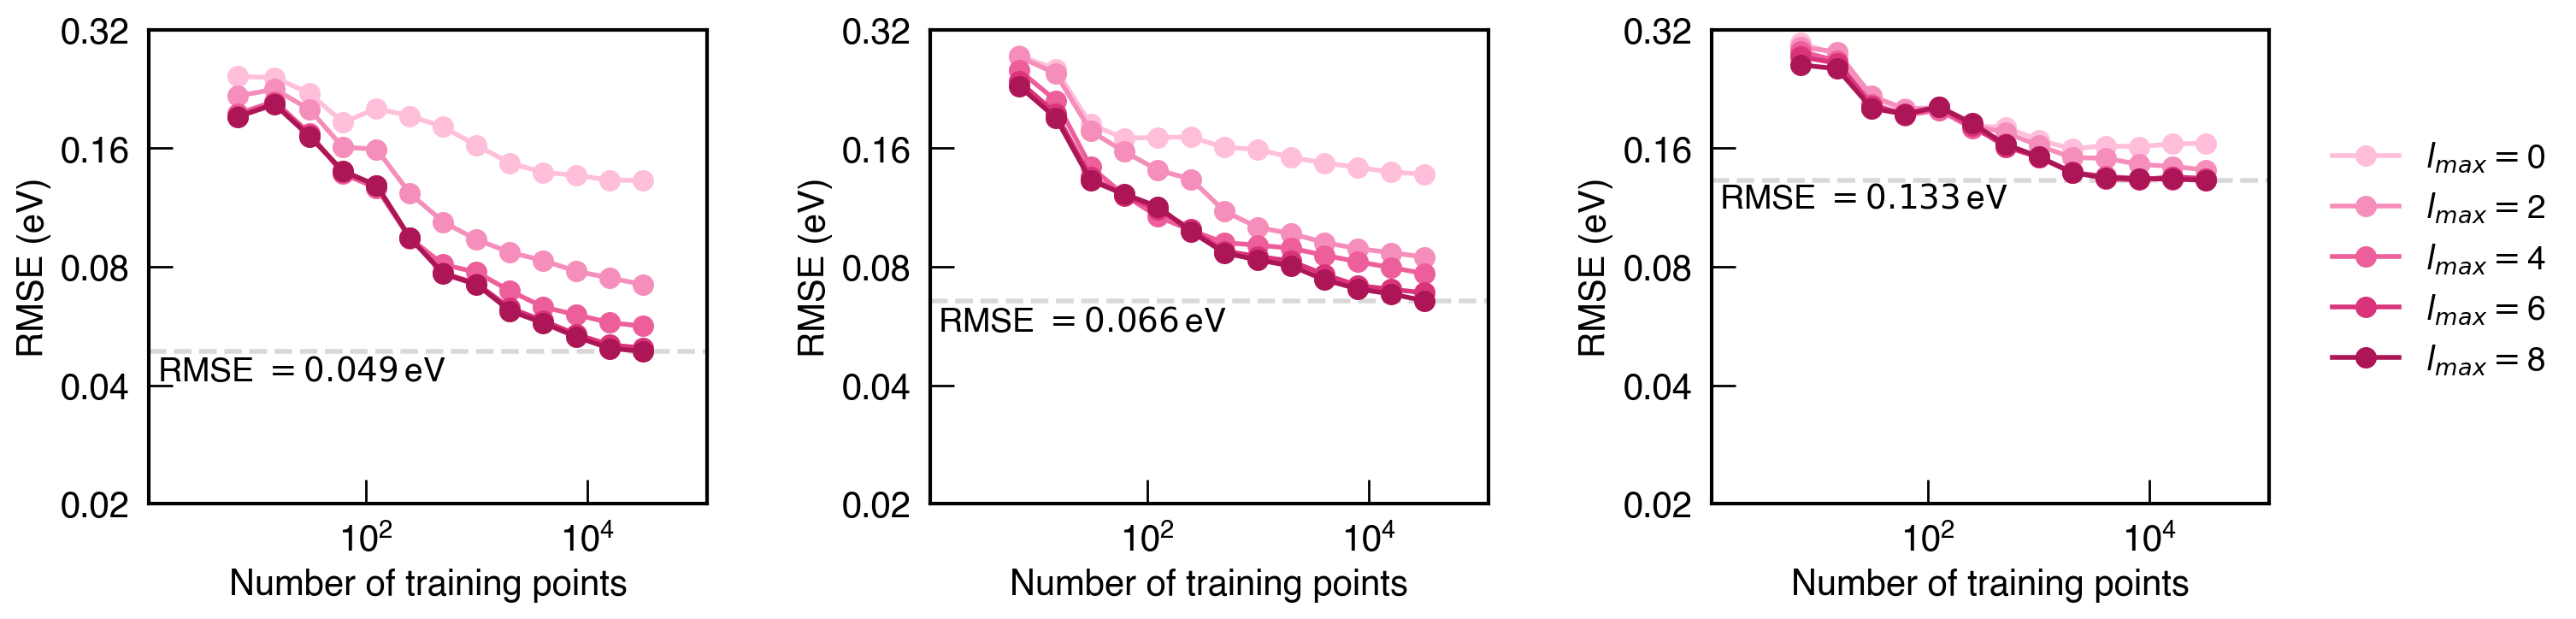

In [24]:
size = 4
fig, axs = plt.subplots(ncols=3,figsize=(4*size,size*0.9))  
colour = '#AD1656'
y_pos = [0.041,0.055,0.113]
colours = ["#ffbfda","#f58eba","#ed5f9b","#d9347a","#ad1656"]


i=0
for s, ax in zip(struct_types,axs):
    j = 0 
    for l in range(0,9,2):
        x1, y1, ticks, labels = get_learning_curve_data(s,l_max=l)
        # x2, y2, ticks, labels = get_learning_curve_data(s,l_max=8,linker_type='H_new')
        ax.plot(x1,y1,marker='o',linewidth=2,markersize=8,color=colours[j],label='$l_{max}=$'+f'{l}')
        # ax.plot(x2,y2,marker='o',linewidth=2,markersize=8,color=colour,alpha=0.2,label='$l_{max}=8$')
        j += 1

    set_axes_labels(ax,'Number of training points','RMSE (eV)')
    set_axes_scale(ax,x_scale='log',y_scale='log')
    set_axes_ticks(ax,y_labels=labels,y_ticks=ticks,minor_ticks=False)
    ax.set_xlim(1.1,120000)
    
    
    # label the minimum rmse value
    ax.axhline(y=y1.min(),linestyle='--',color='grey',linewidth=2,zorder=0,alpha=0.3)
    ax.text(10,y1.min(),f'\nRMSE $= {y1.min():.3f}\,$eV',fontsize=14,linespacing=2.2,fontdict={'family':'Helvetica','weight':'bold'},position=(1.3,y_pos[i]))
    i+=1
plt.subplots_adjust(wspace=0.4)
axs[2].legend(bbox_to_anchor=(1, 0.9),fontsize=14,frameon=False)
plt.savefig(f'../figures/final_figures/learning_curves_ablation_study.pdf',bbox_inches='tight')